In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [2]:
def data_preprocessor(file_path):
    df = pd.read_excel(file_path, sheet_name='Data 1')
    df = df.loc[2:]
    df=df.rename(columns={'Back to Contents':'Date','Data 1: Europe Brent Spot Price FOB (Dollars per Barrel)':'Price'})
    df['Date']= pd.to_datetime(df['Date'])
    df['Price']= pd.to_numeric(df['Price'])
    return df

In [3]:
df = data_preprocessor('RBRTEd.xls')

In [4]:
df.tail()

,Date,Price
9158,2023-06-20,75.79
9159,2023-06-21,76.92
9160,2023-06-22,73.93
9161,2023-06-23,73.56
9162,2023-06-26,73.86


In [5]:
df['Date']= pd.to_datetime(df['Date'])
df['Price']= pd.to_numeric(df['Price'])

In [6]:
df.set_index(df['Date'])

,Date,Price
Date,,
1987-05-20,1987-05-20,18.63
1987-05-21,1987-05-21,18.45
1987-05-22,1987-05-22,18.55
1987-05-25,1987-05-25,18.60
1987-05-26,1987-05-26,18.63
...,...,...
2023-06-20,2023-06-20,75.79
2023-06-21,2023-06-21,76.92
2023-06-22,2023-06-22,73.93


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df=df['Price'].values.astype(float)
df = df.reshape(-1,1)
scaled_price = scaler.fit_transform(df)

In [8]:
#splitting the data into train and test
train_size = int(len(scaled_price) * 0.80)
test_size = len(scaled_price)- train_size
train , test = scaled_price[0:train_size,:] , scaled_price[train_size:len(scaled_price),:]

In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [10]:
time_step = 90
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [11]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [13]:
X_train.shape

(7237, 90, 1)

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(90,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 90, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 90, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
114/114 [==============================] - 24s 160ms/step - loss: 0.0064 - val_loss: 0.0016
Epoch 2/100
114/114 [==============================] - 17s 151ms/step - loss: 6.5143e-04 - val_loss: 0.0015
Epoch 3/100
114/114 [==============================] - 17s 153ms/step - loss: 5.3822e-04 - val_loss: 0.0011
Epoch 4/100
114/114 [==============================] - 19s 167ms/step - loss: 4.5635e-04 - val_loss: 0.0010
Epoch 5/100
114/114 [==============================] - 18s 160ms/step - loss: 4.5976e-04 - val_loss: 0.0016
Epoch 6/100
114/114 [==============================] - 18s 160ms/step - loss: 4.9122e-04 - val_loss: 8.2991e-04
Epoch 7/100
114/114 [==============================] - 19s 162ms/step - loss: 3.4824e-04 - val_loss: 9.2116e-04
Epoch 8/100
114/114 [==============================] - 19s 171ms/step - loss: 3.3718e-04 - val_loss: 7.0787e-04
Epoch 9/100
114/114 [==============================] - 20s 176ms/step - loss: 2.8717e-04 - val_loss: 9.1367e-04
Epoch 10/100
114

Epoch 74/100
114/114 [==============================] - 19s 168ms/step - loss: 7.1235e-05 - val_loss: 1.7879e-04
Epoch 75/100
114/114 [==============================] - 19s 164ms/step - loss: 8.7460e-05 - val_loss: 1.7555e-04
Epoch 76/100
114/114 [==============================] - 19s 166ms/step - loss: 7.3667e-05 - val_loss: 1.8145e-04
Epoch 77/100
114/114 [==============================] - 20s 173ms/step - loss: 7.4676e-05 - val_loss: 2.4825e-04
Epoch 78/100
114/114 [==============================] - 20s 171ms/step - loss: 8.3606e-05 - val_loss: 1.7435e-04
Epoch 79/100
114/114 [==============================] - 21s 187ms/step - loss: 8.0456e-05 - val_loss: 2.5526e-04
Epoch 80/100
114/114 [==============================] - 23s 201ms/step - loss: 8.8296e-05 - val_loss: 1.7378e-04
Epoch 81/100
114/114 [==============================] - 23s 200ms/step - loss: 7.3439e-05 - val_loss: 1.8879e-04
Epoch 82/100
114/114 [==============================] - 20s 175ms/step - loss: 7.5054e-05 - val_

In [20]:
train_predict=model.predict(X_train)

227/227 [==============================] - 9s 34ms/step


In [21]:
X_test.shape

(1742, 90, 1)

In [22]:
test_predict=model.predict(X_test)

55/55 [==============================] - 2s 36ms/step


### Model Evaluation

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [28]:
y_train[0],y_test[0]

(0.07104189840563589, 0.2833518724508714)

In [29]:
train_predict[0],test_predict[0]

(array([0.0663332], dtype=float32), array([0.26190645], dtype=float32))

In [35]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [43]:
print('Train Mean Absolute Error:', mean_absolute_error(y_train, train_predict))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train, train_predict)))
print('Test Mean Absolute Error:', mean_absolute_error(y_test, test_predict))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, test_predict)))

Train Mean Absolute Error: 0.006891861223526935
Train Root Mean Squared Error: 0.009815696012116347
Test Mean Absolute Error: 0.010759973338175128
Test Root Mean Squared Error: 0.014664364779137126


In [56]:
# Unscaling to get values in original format.
unscaled_y_train = scaler.inverse_transform(y_train)
unscaled_y_test = scaler.inverse_transform(y_test)
unscaled_train_preds = scaler.inverse_transform(train_predict)
unscaled_test_preds = scaler.inverse_transform(test_predict)

In [57]:
og_ytrain = [i for sublist in unscaled_y_train for i in sublist]
og_ytest = [i for sublist in unscaled_y_test for i in sublist]
train_preds = [i for sublist in unscaled_train_preds for i in sublist]
test_preds = [i for sublist in unscaled_test_preds for i in sublist]

In [115]:
print('◉Train Mean Absolute Error:', mean_absolute_error(og_ytrain, train_preds))
print('◉Train Root Mean Squared Error:',np.sqrt(mean_squared_error(og_ytrain, train_preds)))
print('◉Test Mean Absolute Error:', mean_absolute_error(og_ytest, test_preds))
print('◉Test Root Mean Squared Error:',np.sqrt(mean_squared_error(og_ytest, test_preds)))

◉Train Mean Absolute Error: 0.9293671837554082
◉Train Root Mean Squared Error: 1.323646028008785
◉Test Mean Absolute Error: 1.4509820900007175
◉Test Root Mean Squared Error: 1.9774892106388844


In [67]:
len(og_ytest),len(test_preds)

(1742, 1742)

In [ ]:
plt.plot()

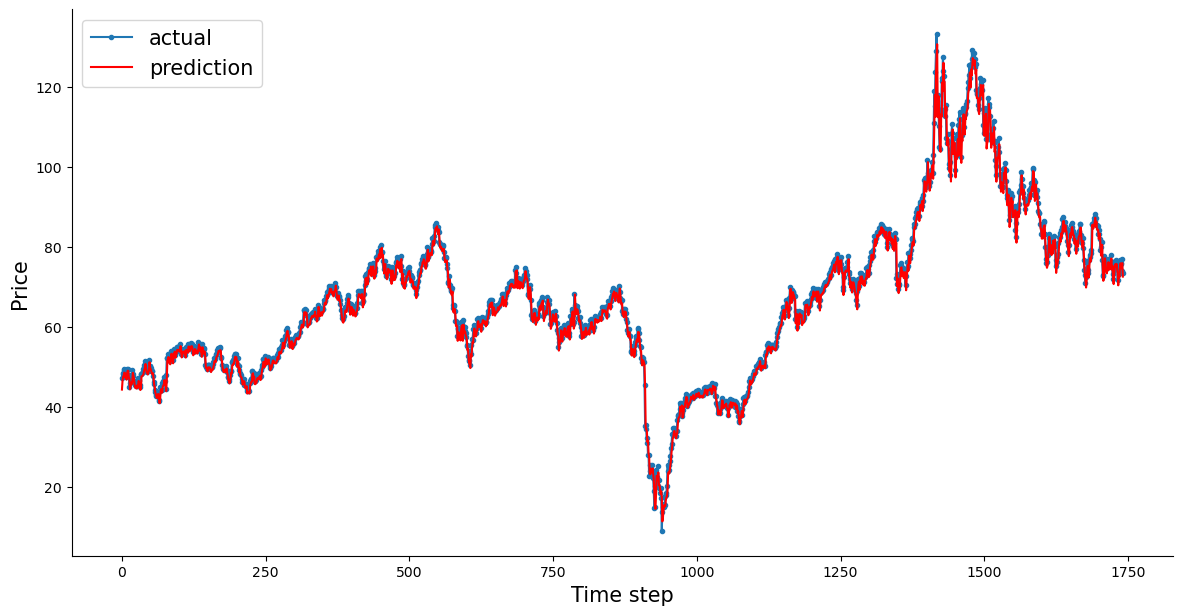

In [78]:
#Compare Actual vs. Prediction
aa=[x for x in range(1742)]
plt.figure(figsize=(12,6))
plt.plot(aa, og_ytest[:1742], marker='.', label="actual")
plt.plot(aa, test_preds[:1742], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

---

In [79]:
df1 =data_preprocessor('RBRTEd.xls')

In [80]:
df1['Date']= pd.to_datetime(df1['Date'])
df1['Price']= pd.to_numeric(df1['Price'])

In [81]:
df1.set_index(df1['Date'])

,Date,Price
Date,,
1987-05-20,1987-05-20,18.63
1987-05-21,1987-05-21,18.45
1987-05-22,1987-05-22,18.55
1987-05-25,1987-05-25,18.60
1987-05-26,1987-05-26,18.63
...,...,...
2023-06-20,2023-06-20,75.79
2023-06-21,2023-06-21,76.92
2023-06-22,2023-06-22,73.93


In [82]:
train_1   = df1.iloc[0:train_size,:] 

In [83]:
test_1 = df1.tail(1702)

In [84]:
train_predictions= scaler.inverse_transform(train_predict)

In [85]:
train_predictions = pd.DataFrame(train_predictions,columns=['predicted_price'])

In [86]:
result =  pd.concat([train_1, train_predictions], axis=1, join='inner')
result

,Date,Price,predicted_price
2,1987-05-20,18.63,18.190838
3,1987-05-21,18.45,18.207710
4,1987-05-22,18.55,18.104561
5,1987-05-25,18.60,18.054111
6,1987-05-26,18.63,18.063078
...,...,...,...
7232,2015-11-18,41.45,36.185211
7233,2015-11-19,42.22,36.257713
7234,2015-11-20,42.49,36.007324
7235,2015-11-23,43.70,35.626774


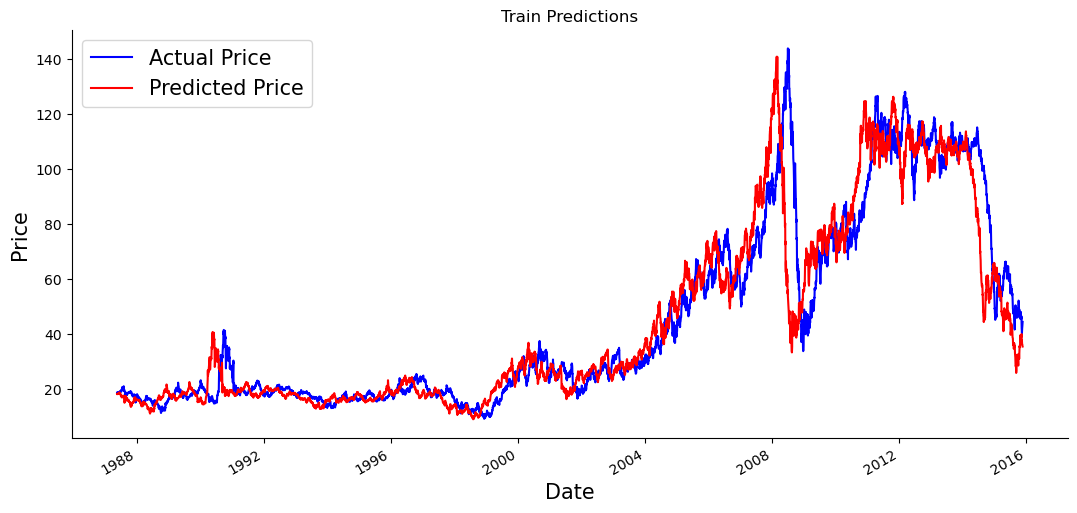

In [111]:
colors = ['blue', 'red']
result.plot(x='Date', y=['Price', 'predicted_price'], color=colors, label=['Actual Price', 'Predicted Price'], figsize=(12, 6))
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Date',size=15)
plt.legend(fontsize=15)
plt.title("Train Predictions")
plt.show();

In [88]:
test_predictions= scaler.inverse_transform(test_predict)


In [89]:
test_predictions = pd.DataFrame(test_predictions,columns=['predicted_price'])

In [90]:
test_1.reset_index(inplace=True)

In [91]:
result_1= pd.concat([test_1,test_predictions], axis=1, join='inner')

In [92]:
result_1=result_1.set_index(result_1['index'])

In [93]:
result_1.drop('index',axis=1,inplace=True)

In [94]:
result_1

,Date,Price,predicted_price
index,,,
7461,2016-10-11,50.48,44.418083
7462,2016-10-12,49.53,46.575520
7463,2016-10-13,49.29,47.630783
7464,2016-10-14,48.87,47.857239
7465,2016-10-17,49.31,48.648914
...,...,...,...
9158,2023-06-20,75.79,84.476349
9159,2023-06-21,76.92,84.344612
9160,2023-06-22,73.93,82.064507


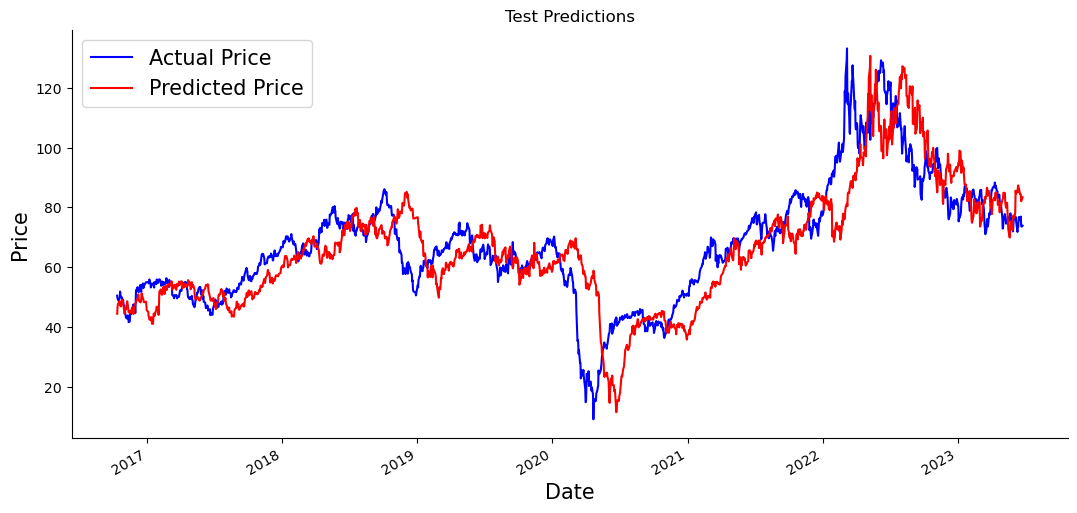

In [109]:
colors = ['blue', 'red']
result_1.plot(x='Date', y=['Price', 'predicted_price'], color=colors, label=['Actual Price', 'Predicted Price'], figsize=(12, 6))
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Date',size=15)
plt.legend(fontsize=15)
plt.title("Test Predictions")
plt.show();

In [96]:
final_result = pd.concat([result,result_1],axis=0,join='outer')
final_result

,Date,Price,predicted_price
2,1987-05-20,18.63,18.190838
3,1987-05-21,18.45,18.207710
4,1987-05-22,18.55,18.104561
5,1987-05-25,18.60,18.054111
6,1987-05-26,18.63,18.063078
...,...,...,...
9158,2023-06-20,75.79,84.476349
9159,2023-06-21,76.92,84.344612
9160,2023-06-22,73.93,82.064507
9161,2023-06-23,73.56,82.404938


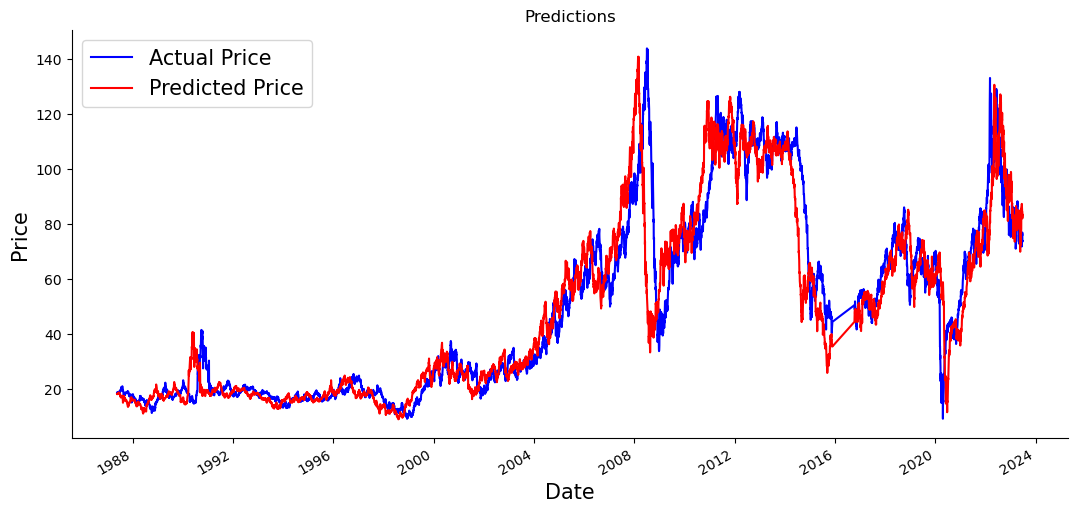

In [110]:
colors = ['blue', 'red']
final_result.plot(x='Date', y=['Price', 'predicted_price'], color=colors, label=['Actual Price', 'Predicted Price'], figsize=(12, 6))
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Date',size=15)
plt.legend(fontsize=15)
plt.title("Predictions")
plt.show();

In [105]:
model.save(r'C:\Users\91775\DATA SCIENCE\projects\Forecasting_crude_oil\Ipynb files\lstm.h5')

In [ ]:
# from tensorflow import keras 
# model = keras.models.load_model('path/to/location')

----

----